In [1]:
import pickle
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np

noisy_benchmark = pickle.load(open('./data/noisy_benchmark.p', 'rb' ))

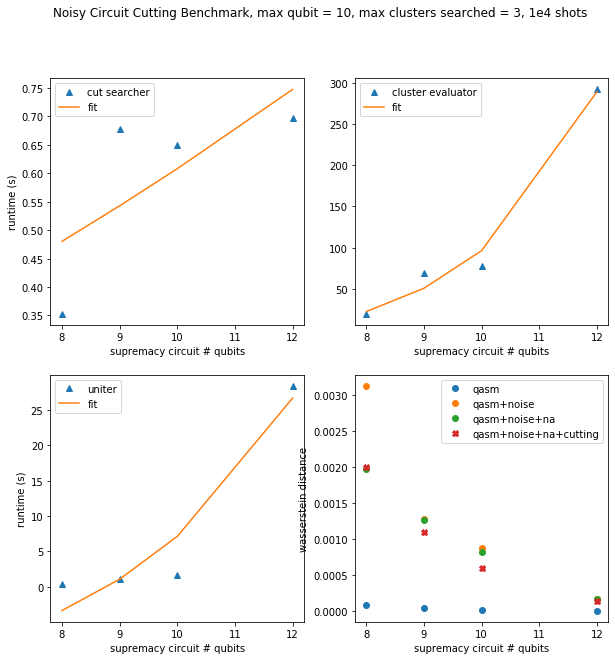

In [3]:
def func(x, a, b):
    return np.exp(a*x)+b
num_qubits,times,qasm_distances,qasm_noise_distances,qasm_noise_na_distances,qasm_noise_na_cutting_distances = noisy_benchmark

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(num_qubits,times['searcher'],'^',label='cut searcher')
optimizedParameters, pcov = opt.curve_fit(func, np.array(num_qubits), np.array(times['searcher']))
plt.plot(num_qubits, func(np.array(num_qubits), *optimizedParameters), label="fit")
plt.xlabel('supremacy circuit # qubits')
plt.ylabel('runtime (s)')
plt.legend()
plt.subplot(222)
plt.plot(num_qubits,times['evaluator'],'^',label='cluster evaluator')
optimizedParameters, pcov = opt.curve_fit(func, np.array(num_qubits), np.array(times['evaluator']))
plt.plot(num_qubits, func(np.array(num_qubits), *optimizedParameters), label="fit")
plt.xlabel('supremacy circuit # qubits')
plt.legend()
plt.subplot(223)
plt.plot(num_qubits,times['uniter'],'^',label='uniter')
optimizedParameters, pcov = opt.curve_fit(func, np.array(num_qubits), np.array(times['uniter']))
plt.plot(num_qubits, func(np.array(num_qubits), *optimizedParameters), label="fit")
plt.xlabel('supremacy circuit # qubits')
plt.ylabel('runtime (s)')
plt.legend()
plt.subplot(224)
plt.plot(num_qubits,qasm_distances,'o',label='qasm')
plt.plot(num_qubits,qasm_noise_distances,'o',label='qasm+noise')
plt.plot(num_qubits,qasm_noise_na_distances,'o',label='qasm+noise+na')
plt.plot(num_qubits,qasm_noise_na_cutting_distances,'X',label='qasm+noise+na+cutting')
# plt.yscale('log')
plt.xlabel('supremacy circuit # qubits')
plt.ylabel('wasserstein distance')
plt.legend()
plt.suptitle('Noisy Circuit Cutting Benchmark, max qubit = 10, max clusters searched = 3, 1e4 shots')
# plt.savefig('./data/benchmark_early_termination.png')
plt.savefig('./data/noiseless_benchmark.png')